This session introduces key notions in data cleaning.  A primary concern of the instructor in this new environment of 'remote teaching' is that without structure, you may just fall through the cracks and not get stuff done. So let's reiterate. <b>We care that you learn</b>, and you will be tested in one week on what you have learned. Make a schedule, ask questions</b> (your instructor is always happy to hear from you by emails!), follow a good structure so you can keep learning well in this course.

<h1><center>Basics of data cleaning for CSCI 412/612: outliers</center></h1>

At this stage, you are able to reformat raw data into a proper spreadsheet and run a classification algorithm on it. Unfortunately, there is a _lot_ more to be done on data pre-processing. By considering that all data is equally valuable and giving it all to the algorithm, we also pass on a lot of trash. And as the saying goes, "garbage in, garbage out". 

If we build a model on bad data, we get a bad model. So let's start dealing with what can make data 'bad'. The <font color='red'>focus of this lab is on outliers</font>. Specifically, the objectives are to:
1. Detect the __presence of outliers__, and
2. __Handle the outliers__.

The <font color='blue'>dataset is downloaded using the first cell of code. If you mess up the data when writing your own code, simply re-run the topmost cell and it will reset your data!</font>

<img src="https://cdn-images-1.medium.com/max/1200/1*yWFQiGjlgHUVYeh4ELELyw.jpeg">

* Useful references:
* https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/
* https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

# 1. A classic but rigid definition of outliers

An outlier is a data point that significantly 'differs' from others. In other words, an outlier is a point that may not be very representative of the overall distribution. <b>Applying machine learning on data that has outliers may produce poor results</b>, because the outliers will have a disproportionate impact. That is, a machine learning method may be significantly biased by the presence of a few outliers, and thus produce results that will not generalize well. 

The code below will open data that has outliers. You will use this <b>dataset</b> throughout the lab. If you mess it up, simply re-run the cell below and it'll load up it fresh again.

In [2]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

#the data is hosted online, so we specify the URL
dataURL="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
#we open the dataset noting that there is no header line.
#In the absence of a header, columns are automatically numbered, starting at 0
#Rather than just having numbers, we add a prefix V, making them V0, V1, ...
dataset=pd.read_csv(dataURL,header=None,prefix="V")
dataset.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
#Deleting column V60 since it is a string value and we want only float values
del dataset['V60']
# del dataset_without_outliers['V60']
dataset

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293

## 1.1 Graphical approach: visually inspecting distributions
When we get new data, sometimes we have no idea what's inside. Visualizing it isn't a proof, so it's not particularly rigorous, but it gives a 'sense' of what statistics we may actually need to apply. We may get a first intuitive feeling for the presence of outliers when noticing that:
1. the bulk of the data falls in a narrow region, with very few points are far from this. That is, we have a long tailed distribution.
2. there are gaps in the tail of the distribution, with a few points "out there" on their own.

An example that matches these two criteria is shown in the picture below, where the point on the left is an outlier:
<img src="http://mathworld.wolfram.com/images/eps-gif/OutlierHistogram_1000.gif">

> ___Milestone 1___
>
> Write a script that loops through the columns of your data and outputs <b>one histogram for each distribution</b> so you can visualize them. You can limit yourself to looping through 10-20 of them: you _do not_ need to look at all 60 features! To plot with Pandas, [check this link!](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-hist)
>
> Please <b>avoid displaying several histograms on the same space</b> (i.e. on top of each other). That gets very confusing quickly, so after 3 overlays you just cannot see anything anymore.
>
> Visually inspect the output of your script, and note which columns look like they may have outliers. Finally, in a Markdown-formatted table, <font color='blue'><b>list the 3 features that most clearly exhibit the presence of outliers in your eyes.</b></font> You're only looking for the top three 'most striking outliers', so you don't need to list every single one.

---
---
_Your beautiful code will be written in the cell below._

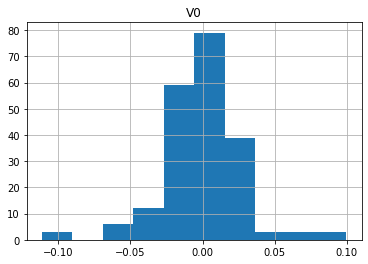

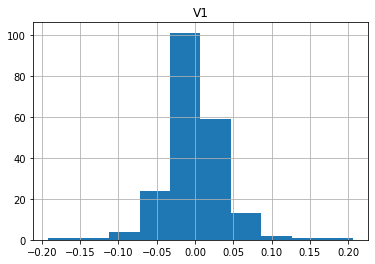

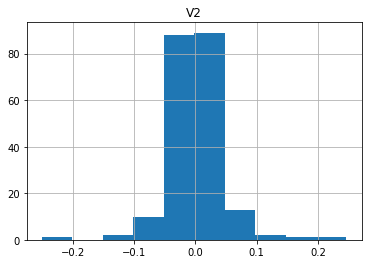

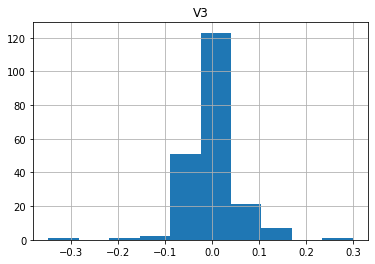

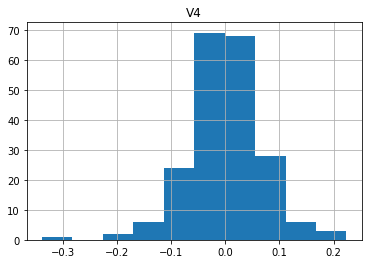

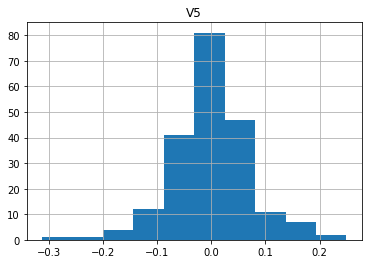

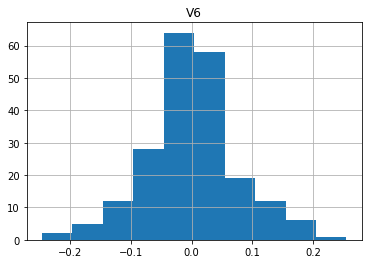

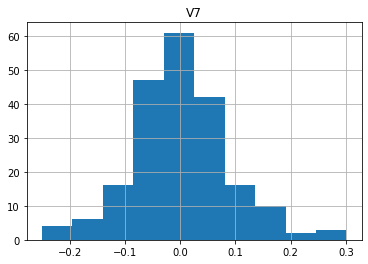

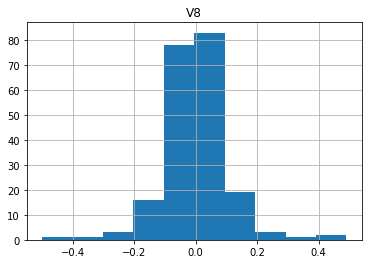

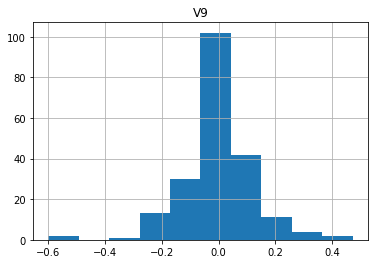

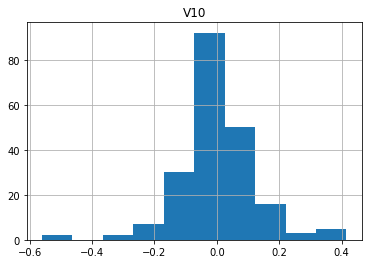

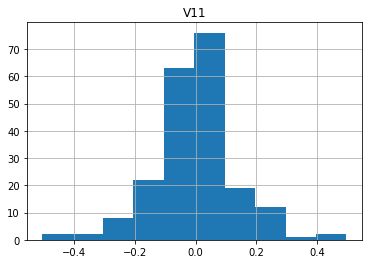

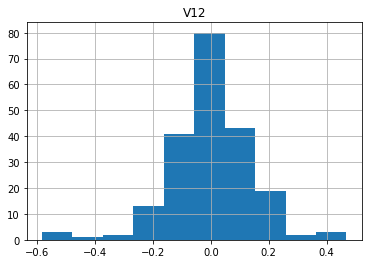

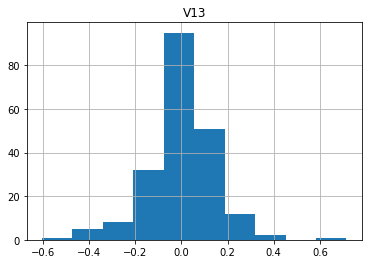

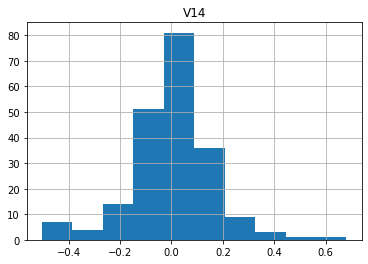

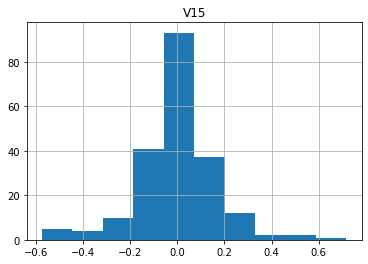

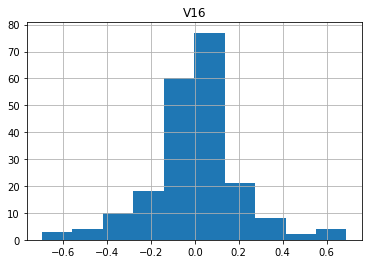

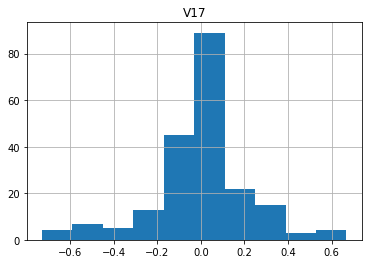

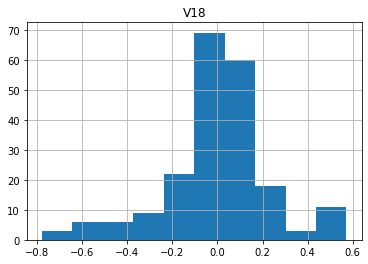

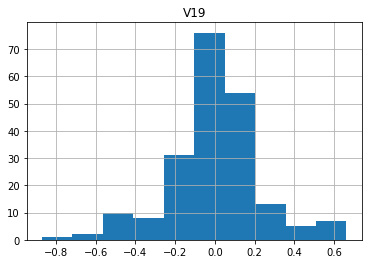

In [169]:
counter = 0
for x in dataset:
  if(counter < 20):
    #Put down a different plot per counter value
    plt.figure(counter)
    #Create
    dataset[x].diff().hist();
    plt.title(x)
    counter +=1

V9, V10 and V13 have the most signifigcant outliers of the 20 histograms that are shown.

> ___<font color='grey'>(Optional)</font> Milestone 1: Stretch Goal___
>
> Plotting dozens of histogram is a simple way to see what it's in the data, but it's a bit <i>primitive</i> and overwhelming. We have developed much more informative approaches. Dumping all these histograms is like using an axe to chop trees: it works, but everyone else uses chainsaws and will think that you belong to a different century with your axe. A professional data scientist would normally use more compact information visualizations: at the very least a <b>boxplot</b> (out of laziness...) or preferentially a <b>violin plot</b>. A boxplot can summarize key features of a histogram using a single column, so you can pack a lot of information in the same space (instead of one histogram after one histogram). 
>
> [This link](https://matplotlib.org/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py) shows you how to use boxplots. Look closely at the second figure which has ten boxplots: that summarizes the information that you would otherwise display in ten consecutive histograms!
>
> The issue with a boxplot is that a lot of information is lost. We can se quartiles, median and outliers... but we have no idea what's the shape of the distribution. So it's not perfectly equivalent to seeing a histogram, which gives us the shape. A violin plot handles that problem: instead of showing every distribution as a 'box' (in a boxplot), it uses curves to hint as to the data distribution. [This link](https://seaborn.pydata.org/generated/seaborn.violinplot.html) shows you how to use violin plots like a pro :)
>
> Our course is on machine learning rather than on data visualization. So you're encouraged to develop professional skills with boxplots and violin plots, but that's not a learning outcome of the course. Hence you're not going to be tested on displaying these visualizations.

---
---
_Your wonderful but optional code may be written in the cell below._

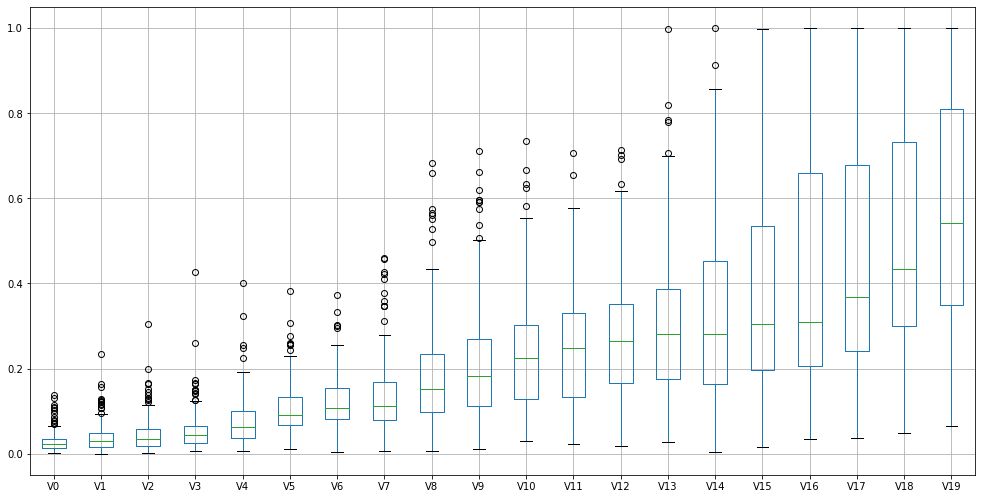

In [6]:
#Controling the size of the graph
fig, ax1 = plt.subplots(figsize=(15,10))

#Controlling fine tunning sizing of the graph
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

#Grab the first 20 features and make it into a list so it can be used by the boxplot function
test =  dataset.keys()[:20].to_list()

#Display all the boxplots on the graph
bp = dataset.boxplot(column = test)

In [7]:
#Make voilin plot here

## 1.2 Statistical approach: deviating from quartiles

Visualizations can be very efficient for communication (e.g., to 'show' that there are outliers) but they can be problematic to automatically process large amounts of data. It's tedious to look at a few distributions, and it's also inconsistent when you make decisions based on what you look at. It's also neither scalable nor automatic, as you have to look, and you can't do it for even dozens of features. Bottom line: we need statistical solutions as they'll lead to automatic, scalable ways to detect outliers.

The simplest such solution consists of doing the following to each feature/column:
1. Compute the quartiles. This tells you the value for 25% (lower quartile), 50%, and 75% (upper quartile) of the data.
2. Compute the inter-quartile range (IQR), that is, the difference between upper and lower quartiles.
3. An outlier is a data point more than <b>1.5</b> IQRs below the lower quartile or above the upper quartile.

Here is an example. Feature V0 has a lower quartile of 0.013350, and an upper quartile of 0.035550. This leads to $IQR = 0.035550 - 0.013350 = 0.0222$. That means that a data point is an outlier if it's less than $0.013350 - 1.5*0.0222 = -0.01995$, or more than $0.035550 + 1.5*0.0222 = 0.06885$. In this case, the point 0.137100 would be flagged as outlier.

> ___Milestone 2___
>
> For each column, compute the quartiles and then the IQR. Count how many values in this column qualify as outliers. By repeating your calculation across each column, provide the <font color='blue'>% of values that qualify as outliers.</font>
>
> _Hint: To get the quartiles, you can ask Pandas to statistically describe the data via dataset.describe(), and that produces a new data frame (so it's easy to loop through)._

---
---
Fantastic code starts below!

In [8]:
dataset.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,

In [167]:
#Store the pandas description of the dataset for ease of access
stats = dataset.describe()

#For each features in the discrption of the dataset
for this_feature in stats:
  #Calculate the lower quartile and store it
  Low_Quart = stats[this_feature]['25%']
  #Calculate the highest quartile and store it
  High_Quart = stats[this_feature]['75%']

  #Calculate the Inter-Quartile range for this column
  this_IQR = High_Quart - Low_Quart
  #Calculate the minumum and maximum value a value has to pass to be considered an outlier
  Less_For_Out = Low_Quart - 1.5 * this_IQR
  More_For_Out = High_Quart + 1.5 * this_IQR

  #For each value in this column
  count = 0  
  for this_value in dataset[this_feature]:
    #Check if a value in the column is an outlier
    if(this_value < Less_For_Out or this_value > More_For_Out):
      count += 1

  #Calculate the percentage of the total values that are outliers 
  percentage = count / dataset[this_feature].count()

  print(this_feature, 'has', percentage.round(4), '% of its values as outliers')

V0 has 0.0721 % of its values as outliers
V1 has 0.0625 % of its values as outliers
V2 has 0.0529 % of its values as outliers
V3 has 0.0625 % of its values as outliers
V4 has 0.024 % of its values as outliers
V5 has 0.0385 % of its values as outliers
V6 has 0.024 % of its values as outliers
V7 has 0.0529 % of its values as outliers
V8 has 0.0385 % of its values as outliers
V9 has 0.0481 % of its values as outliers
V10 has 0.024 % of its values as outliers
V11 has 0.0096 % of its values as outliers
V12 has 0.0192 % of its values as outliers
V13 has 0.024 % of its values as outliers
V14 has 0.0096 % of its values as outliers
V15 has 0.0 % of its values as outliers
V16 has 0.0 % of its values as outliers
V17 has 0.0 % of its values as outliers
V18 has 0.0 % of its values as outliers
V19 has 0.0 % of its values as outliers
V20 has 0.0 % of its values as outliers
V21 has 0.0 % of its values as outliers
V22 has 0.0 % of its values as outliers
V23 has 0.0096 % of its values as outliers
V24 ha

In the second task, you computed the % of all values that are outliers. It's important to understand how it affects the rows/samples/entries. What you eventually feed to a machine learning algorithm is a set of rows (themselves consisting of values). If most rows are affected by outliers, then it means there is garbage throughout your dataset, and it lowers the confidence you can have in your results. Alternatively, if only a few rows are affected by outliers, then you may simply remove them and focus on a sufficient large sample of good quality data.

__We'll create a visualization showing how the rows are affected by outliers__. The $y$-axis is the percentage of rows. The $x$-axis states that this % of rows has exactly $x$ outlier values (i.e. there are $x$ columns on which this % of rows has outliers). For example, $y$=50 and $x$=2 would say that half of your data has 2 outliers. Similarly, $y$=20 and $x$=10 states that 20% of your data has 10 outliers. Here is a sketch:
<img src="sketch.png">

> ___Milestone 3___
>
> <font color='blue'>Write the code to create this figure based on your data.</font>
>
> _Hint: loop over the number of missing values $x$ and compute what percentage $y$ it affects. You can store this data in a data series, and then [plot it as bar graph](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-barplot)._

Beautiful code starts here.

---
---

In [ ]:
#creating a copy of a dataset we can change values on
dataset_no_outliers = dataset.copy(deep=True)
dataset_no_outliers

In [ ]:
#Replace all the outliers with NaN

#Store the pandas description of the dataset for ease of access
stats_no_outliers = dataset_no_outliers.describe()

#For each features in the discrption of the dataset
for this_feature in stats:
  #Calculate the lower quartile and store it
  Low_Quart = stats[this_feature]['25%']
  #Calculate the highest quartile and store it
  High_Quart = stats[this_feature]['75%']

  #Calculate the Inter-Quartile range for this column
  this_IQR = High_Quart - Low_Quart
  #Calculate the minumum and maximum value a value has to pass to be considered an outlier
  Less_For_Out = Low_Quart - 1.5 * this_IQR
  More_For_Out = High_Quart + 1.5 * this_IQR

  #For each value in this column

  # for this_value in dataset_no_outliers[this_feature]:
  for index, this_value in dataset[this_feature].iteritems():
    
    #Check if a value in the column is an outlier
    #I am also replacing outlier values with NaN
    if(this_value < Less_For_Out or this_value > More_For_Out):
      # print("The less is: ", Less_For_Out, " And the More For is:", More_For_Out)
      print("This_Value is for original dataset is: ", this_value)
      print("The value at the other dataset index and feature is: ", dataset_no_outliers.at[index, this_feature])
      dataset_no_outliers.at[index, this_feature] = None


In [73]:
#Checking dataset again to see if any NaN's can be seen
dataset_no_outliers

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,NaN,0.2156,NaN,0.3337,0.2872,0.4918,NaN,NaN,NaN,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,NaN,NaN,NaN,NaN,NaN,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,NaN,NaN,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,NaN,NaN,NaN,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,NaN,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1.0000,0.997

In [121]:
#Now that the outliers have been replaced by NaN we can start calculating the percentage of outliers

#X is the number of rows that has specifically this many outliers
#Y is the the total percentage of rows that have this many outliers
# dataset_no_outliers.size #There are a total of 12,480 cells in this dataframe

outlier_array = []

for index, row in dataset_no_outliers.iterrows():
  
  number_of_outliers = 0

  for value in row:
    if( pd.isna(value)):
      
      number_of_outliers += 1
      # print(number_of_outliers)
    
  
  # outlier_by_Row.append(pd.Series([number_of_outliers]))
  outlier_array.append(number_of_outliers)
  # print(number_of_outliers)

outlier_by_Row = pd.Series(outlier_array)

outlier_by_Row


0      0
1      5
2      7
3      3
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Length: 208, dtype: int64

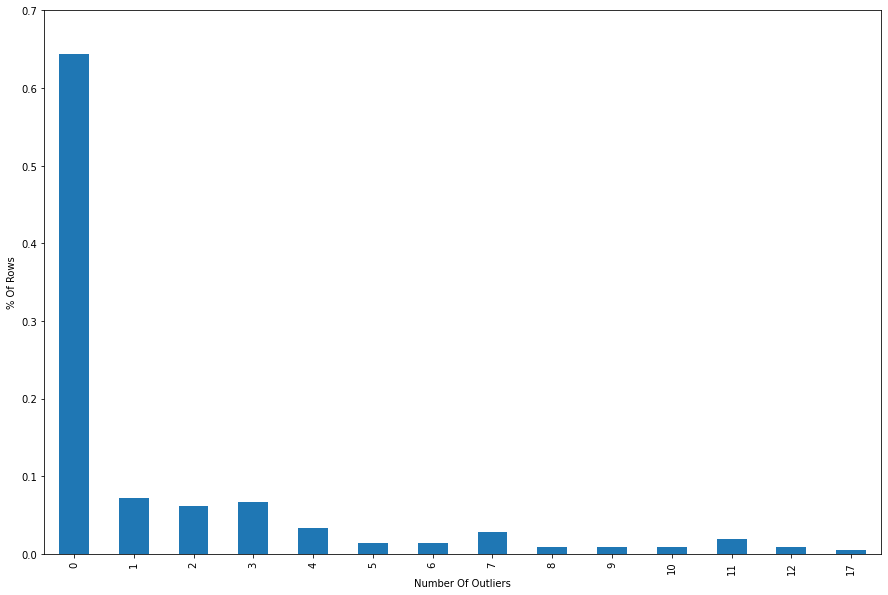

In [160]:
#calculate the percentage of the same values are the total 
fig, ax1 = plt.subplots(figsize=(15,10))

ax1.set_xlabel("Number Of Outliers")
ax1.set_ylabel("% Of Rows")

Percentage_by_number_of_rows = outlier_by_Row.value_counts(normalize=True)
sorted_by_index = Percentage_by_number_of_rows.sort_index()
sorted_by_index.plot.bar(ylim=(0,0.7))

# 2. A more flexible notion of outliers
## 2.1 Graphical approach: quantile-quantile (QQ) plot

A __very important shortcoming__ of either method in section 1 is that they take a very rigid definition of outliers where having long tails is bad no matter what. However, not all data is supposed to be distributed around a mean 'representative' values. Sometimes the data is distributed according to very skewed distributions, and that's what it's supposed to be: ignoring the tail of the distribution would actually make an erroneous assumption of normalcy. So we need a more flexible notion of what it means to be an outlier. 

An outlier means that some values significantly derive from what would be obtained by an _assumed distribution_. Which distribution to assume depends on what we know about the problem. Sometimes, we expect a normal distribution (e.g., distribution of height). Sometimes, we expect a heavy tail distribution (e.g., distribution of incomes).

A __Q–Q__ plot is a plot of the quantiles of two distributions against each other. The pattern of points in the plot is used to compare the two distributions. When your sample matches the expected distribution, you see points on the diagonal. When points deviate from the diagonal, it means that it doesn't match. This example from Wikipedia shows that a dataset follows a Weibull distribution (i.e. most points fall on the diagonal), with the exception of three outliers:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Weibull_qq.svg/360px-Weibull_qq.svg.png">
(If you want to know more, you can read the Wikipedia entry on [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot).) 

Here is the code to perform a Q-Q plot on column V0, by comparison with a normal distribution.

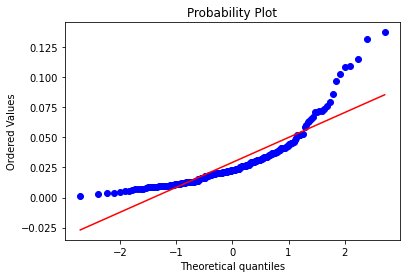

In [162]:
import numpy as np
import scipy.stats as stats #full of great statistical functions!
import pylab
stats.probplot(dataset["V0"], dist="norm",plot=pylab); #the final ; hides the numbers
#the 'dist' can be any continuous distribution listed here:
#https://docs.scipy.org/doc/scipy/reference/stats.html

> ___Milestone 4___
>
> The normal distribution doesn't fit well with our data, as exemplified above on attribute V0. <font color='red'>Pick any attribute you want, and show which distribution would fit it better than a normal</font>. If you're looking for heavy-tailed distributions, you can find a list [here](https://en.wikipedia.org/wiki/Heavy-tailed_distribution#Common_heavy-tailed_distributions). If you're looking for what scipy.stats gives you access to, you'll find it under continuous distributions [here](https://docs.scipy.org/doc/scipy/reference/stats.html).
>
> Please note that <b>not every single distribution will work</b>. Some will just crash because they cannot be used a distribution arguments in a probplot. Don't worry about the ones that crash (they're more complicated to use): simply look through the various options, note the ones that don't crash, and see what the result looks like.

---
---
Tremendous code starts below.

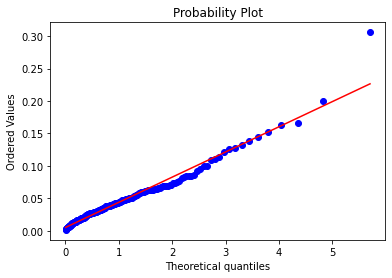

In [164]:
#anglit - Pretty similar to norm
#arcsine - fits alot more linearly
#cauchy - very off from the line but has a min and max
#cosine - pretty similar to norm
#expon - fits really closesly!                       !!!!!!!!!
#gilbrat - pretty close until the last few
#gumbel_r - better than norm but still not to good
#gumbel_l - took too long to run
#halfcauchy - ends way to soon and has weird value placements
#halflogistic - pretty good until later on
#halfnorm - similar to the last
#hypsecant - starts off bad and ends bad but middle good
#kstwobign - similar to the previous
#laplace - start bad and ends bad but middle is good
#levy - huge spike in the beginning
#levy_l - huge spike at the end
#logistic - bad start and end but good middle
#maxwell - similar to the previous
#moyal - pretty good until the end
#norm - bad start and end but devent middle
# rayleigh - pretty good until the end
#semicircular - decent beginning bad end
#uniform - like the previous
#wald - the best one so far with only one value really being off

#The expon distribution is much better than normal
stats.probplot(dataset["V2"], dist="expon",plot=pylab);



## 2.2 Statitical approach: fitting distributions

Similarly to section 1, you can realize that the 'visual' approach of the Q-Q plot can be great communication tool but is a poor idea to automatically find outliers in large datasets. You simply can't keep on typing code to generate different distributions, and visually compare. A more scalable and systematic approach is to __fit curves__. That is, you give Python the equation of a curve (such as the line y=ax+b), and it'll give you the best parameter values (a, b) given your data. If the best fit is still poor, then the curve you thought of wasn't good for that data. If it's a good fit, you can use it for the data, and loop to find points that deviate from it. The code below prepares one feature (V0) for curve fitting, then tries to fit the best possible curve, and displays it. As you'll see, it's a bad fit, because the distribution really doesn't follow a line.

In [ ]:
#----PREPARE DATA FOR CURVE FITTING
import numpy as np
Y,X = np.histogram(dataset['V0'], bins=100) # we fit the DISTRIBUTION of the data
X = X[:-1] + (X[1] - X[0])/2   # convert bin edges to centers

#----FIT THE BEST LINE
from scipy.optimize import curve_fit
def line(x, a, b):
    return a * x + b

popt, pcov = curve_fit(line, X, Y)
popt #values of a and b, that is, the slope and offset

array([-54.53642701,   5.85937439])

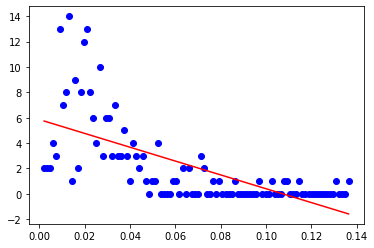

In [ ]:
#compare our fitted line to the data
res=[line(val, popt[0], popt[1]) for val in X] #use our fitted line to compute predictions

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, Y, 'bo', label = 'Original')
plt.plot(X, res, 'r-', label = 'Fit')
plt.show()

> ___Milestone 5___
>
> <font color='red'>Write the code (inspired by the example above) to fit a __good__ curve over feature V0.</font> If you have statistical knowledge, you may look at the distribution, note that it's skewed and figure out the type of distributions that are good 'candidates' for this situation. If you are a bit light on statistics, remember that Milestone 4 had several pointers towards lists of distributions: you can pick some of them, go on Wikipedia to get their equations, and then write them as a function (just like ```def line```). 
>
> Please note that curve fitting does have its limits. If you're trying to find the best fit for a function with two arguments, a curve fitting is essentially a 'somewhat sophisticated way' of doing a grid search (=nested loop) for you. Sometimes it guesses well, and sometimes not so much. If you think your function is the right one but the curve fitting simply cannot seem to handle it, you can write a nested loop yourself. The criteria in the nested loop (i.e. the quantity that the grid search seeks to optimize) is the [goodness-of-fit](https://en.wikipedia.org/wiki/Goodness_of_fit).

Supercalifragilisticexpialidocious code starts there:

---
---

In [165]:
#----PREPARE DATA FOR CURVE FITTING
Y,X = np.histogram(dataset['V0'], bins=100) # we fit the DISTRIBUTION of the data

X = X[:-1] + (X[1] - X[0])/2   # convert bin edges to centers

#----FIT THE BEST LINE
from scipy.optimize import curve_fit
def line(x, a, b):
    return a * x + b

popt, pcov = curve_fit(line, X, Y)
popt #values of a and b, that is, the slope and offset

array([-54.53642701,   5.85937439])

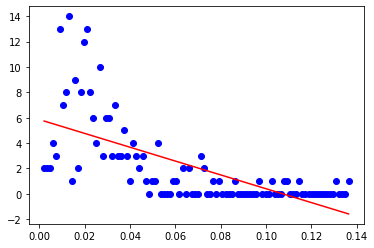

In [166]:
#compare our fitted line to the data
res=[line(val, popt[0], popt[1]) for val in X] #use our fitted line to compute predictions

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, Y, 'bo', label = 'Original')
plt.plot(X, res, 'r-', label = 'Fit')
plt.show()

# 2.3 Empirical distributions
To fit the best curve, you'd need to loop over all 'legit' continuous distributions. There aren't too many, so you certainly can code it. But it's computationally expensive, and your data may just not fit anything too well. For instance, it could be a [mixture distribution](https://en.wikipedia.org/wiki/Mixture_distribution) because it's produced by several distributions together, hence it doesn't look like any __one__ perfectly. The alternative to fitting standard distributions is to use your empirical distributions, that is, turn your distribution into a curve. This code shows you the distribution for our favorite feature V0:

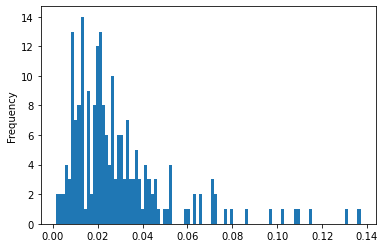

In [ ]:
dataset["V0"].plot(kind="hist", bins=100)

You need to go from the (partial) histogram of your data to the continuous distribution that the (full) data should have. If you don't want to make an assumption on the shape of that distribution, you can __smooth your histogram via a [spline](https://en.wikipedia.org/wiki/Spline_interpolation)__. This code does it:

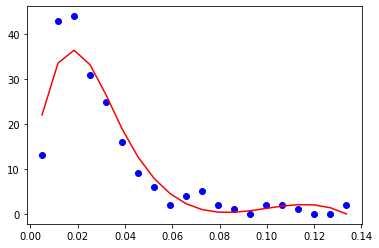

In [168]:
def spline(myData, smoothing=2):
    from scipy.interpolate import UnivariateSpline
    N = len(myData)
    n = int(N/10)
    s = myData
    p, x = np.histogram(s, bins=n) # bin it into n = N/10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=smoothing)
    
    plt.plot(x, p, 'bo', label = 'Original')
    plt.plot(x, f(x), 'r', label = 'Interpolated')
    plt.show()
    return f

spline(dataset["V0"], smoothing=300)
#you can save the result in a variable, and apply .get_coeffs() or .get_knots()
#to have the characteristics of the spline

> ___Milestone 6___
>
> Read the documentation for scipy.interpolate and UnivariateSpline. Then, experiment with different values of smoothing (set to 300 in the example above). Finally, <font color="red">write in plain English what smoothing is, and how it's affected by the value</font>. 

---
---

Your crystal clear explanation starts here!

<font color="grey">Explanations...</font>

# 3. Outlier handling

The previous sections showed you increasingly sophisticated approaches to detect outliers. You have mostly three ways of dealing with them:
* __Removing__ all records that contain them. The code would consist of what you did in the 2nd task (to find outliers), then transform the values in N/A, and use Panda's dropna(). The issue with this approach is that you could end up removing a lot of your data, so realistically you have to presence as much data as you can.
* __Replacing__ outliers by a plausible value (known as 'imputation'). To find a plausible value, you'd need to figure out which distribution is most likely to produce the data. Then, you can remove the erroneous point, and randomly generate one based on the 'right' distribution instead.
* Don't deal with them in the data. Leave them there. But choose __robust machine learning methods__ with built-in approaches to tolerate outliers or missing data points. For instance, if you do a regression, you can't just fit a line as usual. You would need to use a more robust method, [such as Theil-Sen](https://en.wikipedia.org/wiki/Theil%E2%80%93Sen_estimator). 

Note that all three solutions above can __also be used when you have missing data__, instead of incorrect data. 

> ___Milestone 7___
>
> Use the removal method to identify outlier values and discard entries that have them. That is, if a row contains at least one outlier value, that row should be removed.

Somewhat painful but liberating code starts, and ends, here.

---
---